In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/sulthanahmed31/data-mining/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


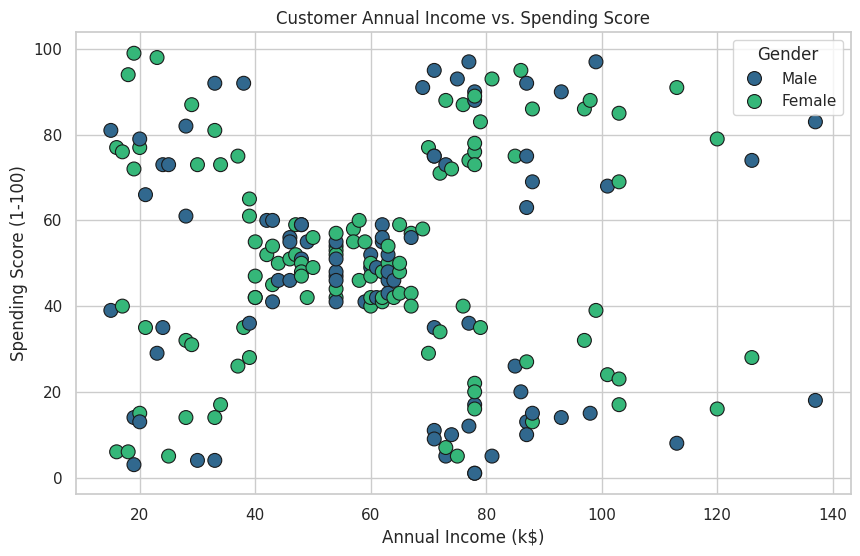

In [6]:
# make an insightful visualization and explain
# Set plot style for aesthetics
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='AnnualIncome',
    y='SpendingScore',
    hue='Gender',
    data=df,
    palette='viridis',
    s=100,
    edgecolor='k'
)

# Add plot titles and labels
plt.title('Customer Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Show plot legend
plt.legend(title='Gender')
plt.show()

In [7]:
# make an insightful visualization and explain
# that visualization to know the annual income vs spending score between male and female

## Data Preprocessing

For this case study, we only use income and spending score

In [8]:
# create new dataframe that consist only annual income and spending score
df = df.iloc[:, -2:]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [11]:
# scale dataset with standard scaler
# Select columns to scale
columns_to_scale = ['AnnualIncome', 'SpendingScore']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled data
df.head()


,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [12]:
# get stastical information on the new dataset
df.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,7.105427e-17,7.549517e-17
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

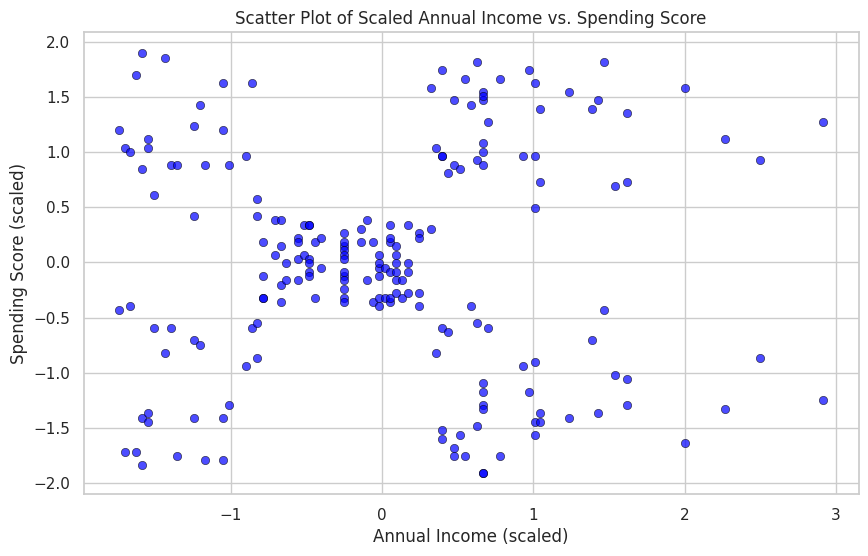

In [20]:
# Visualize the position
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['AnnualIncome'],
    y=df['SpendingScore'],
    color="blue", edgecolor="black", alpha=0.7
)
plt.title("Scatter Plot of Scaled Annual Income vs. Spending Score")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()

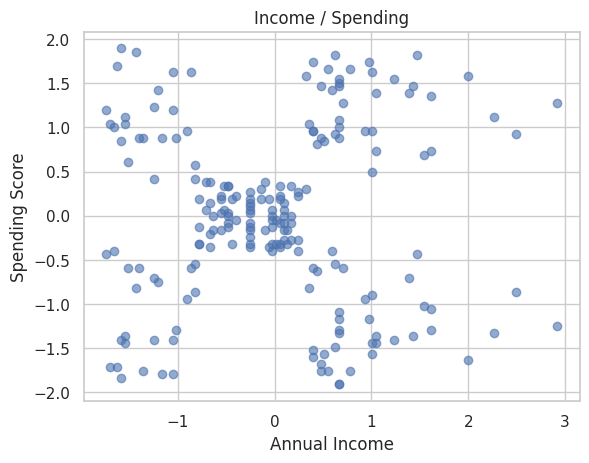

In [22]:
# Visualize the position using the original scale
plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income / Spending")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [24]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

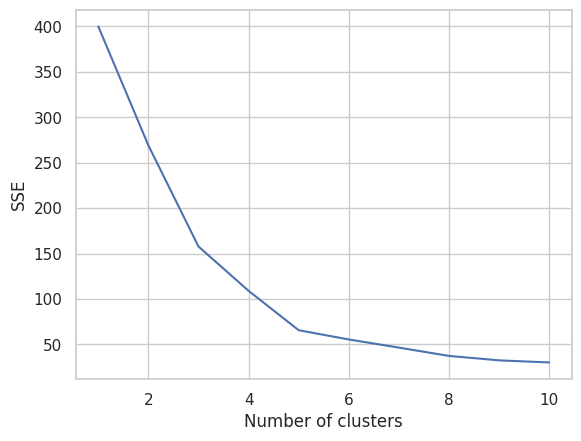

In [25]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [26]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for your model is", kneedle.elbow)

The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [30]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=3, init='random', max_iter=100, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

<ipython-input-31-e9f5daf42763>:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x = "AnnualIncome", y="SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend =  None, data = df, s= 60)


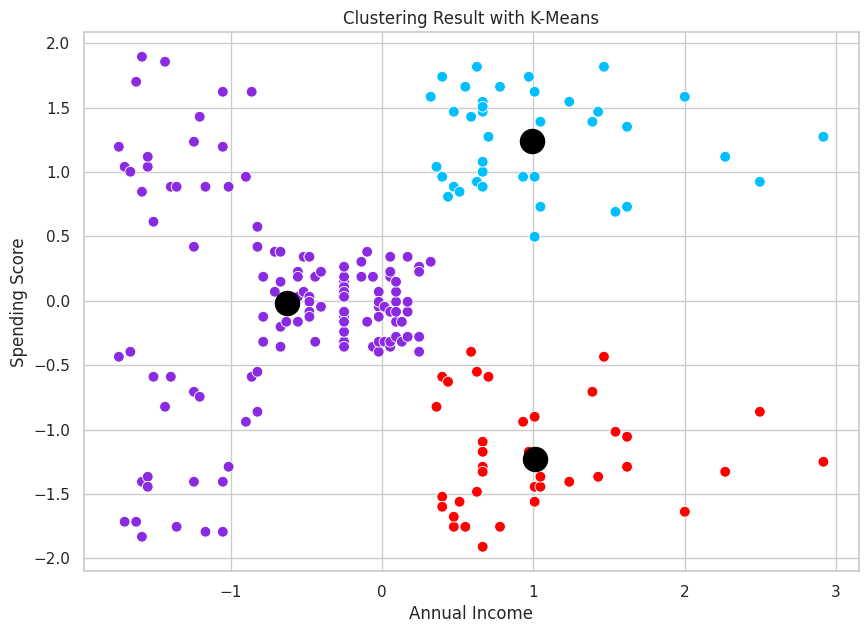

In [31]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y="SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend =  None, data = df, s= 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means")
plt.show()

In [34]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(scaler.inverse_transform(df), columns = ["AnnualIncome", "SpendingScore"])
df['Cluster'] = y_pred
df.head()

,AnnualIncome,SpendingScore,Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0


In [35]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min', 'max'], 'AnnualIncome': ['mean', 'std', 'min', 'max']})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary

SpendingScore                               AnnualIncome            \
                 mean       std       min       max         mean       std   
cluster                                                                      
0           -0.014392  0.764562 -1.832378  1.894492    -0.626190  0.612157   
1           -1.225535  0.423774 -1.910021 -0.395980     1.009200  0.621068   
2            1.239503  0.363544  0.496916  1.816849     0.991583  0.622638   

                             
              min       max  
cluster                      
0       -1.738999  0.322150  
1        0.360319  2.917671  
2        0.322150  2.917671

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

1.Cluster 0

Spending Score = Low

Annual Income = Low

Interpretation = respresents customer with low spending scores and low annual incomes. Maybe one of the people with limited budget

2.Cluster 1

Spending Score = High

Annual Income = Low

Interpretation = spends more than Cluster 0 despite having low income. Might have a specific preferences for products.

3.Cluster 2

Spending Score = Very low

Annual Income = Very high

Interpretation = spends on specific luxury items, or just don't like to spend money. Picky about items they buy.

4.Cluster 3

Spending Score = High

Annual Income = High

Interpretation = The mall's target customer. They're willing to spend a lot.

5.Cluster 4

Spending Score = Moderate

Annual Income = Moderate

Interpretation = Just a regular shopper who lives balanced.

Suggestions for Company :

Target Cluster 3 for high-end products and services.

Target Cluster 1 for specific products that they might be interested in.

Target Cluster 0 for discounts and loyalty program

Target Cluster 2 for exclusive high-end products

Target Cluster 4 for giving bundles and loyalty programs

<write here>